### ECE/CS/ISyE 524 &mdash; Introduction to Optimization &mdash; Spring 2022 ###

# BCycle Optimization

- Cole Nelson (ctnelson2@wisc.edu)
- Thanasis Pittas (pittas@wisc.edu)
- Asmit Nayak (anayak6@wisc.edu)

*****

### Table of Contents

1. [Introduction](#1.-Introduction)
1. [Mathematical Model](#2.-Mathematical-model)
1. [Solution](#3.-Solution)
1. [Results and Discussion](#4.-Results-and-discussion)
1. [Conclusion](#5.-Conclusion)

## 1. Introduction ##

BCycle’s mission is to [“offer a rider-centric bike sharing experience with products that work together to make moving around town as fun and convenient as possible.”](https://www.bcycle.com/) BCycle has made itself prominent in the Madison community by offering a fast, convenient way for students and commuters to get around town by using their electric bikes.

BCycles can be checked in and out from any of several docking stations around the city. Riders with a subscription can use the bike for 1.5 hours before having to re-rack the bike at a docking station. Upon re-racking, the rider can (a) be done with their ride, (b) check out a new bike, or (c) check out the same bike again. Failing to re-rack within 1.5 hours charges the rider with additional fees which, being poor graduate students, we seek to avoid.

This introduces an interesting optimization problem. In this project, we seek to provide an optimal route for a client’s BCycle trip, stopping at various points of interest throughout the day. The client specifies a list of points of interest along with a score for each one of them, indicating how interested they are in visiting them. The client also specifies how much time they are willing to spend touring. Since the list of places may be long or they are far apart from each other, in general the client may not be able visit all of them in the given amount of time! We thus seek to provide them with a route that, in that limited amount of time, maximizes the scores of the places visited.


In this report, we develop routes for several points of interest that the client is interested in visiting, such as Union South, Engineering Hall, the Capitol, etc, as well as several BCycle stations along the way. In the final report, this data will be collected from online sources, but for now arbitrary points are chosen. Furthermore, we make some assumptions such as (a) the client is trying to avoid all fees, (b) the client does not want to re-visit a stop, (c) BCycles will always be available and charged at each docking station. We will review these assumptions with our client.

## 2. Mathematical model ##


### Parameters of the Problem
We have a set of $n$ places $\{1,2,\ldots, n\}$ which is partitioned into BCycle docking stations (denote this set by $B$) and points of interest (denote this set by $P$). The user has specified scores $s_1,\ldots, s_n$ for each of these places that quantify how exciting these places are to the user. Let the symmetric matrix $G \in \mathbb{R}^{n \times n}$ with $G_{i,j}$ being equal to the time it takes to go from place $i$ to place $j$. That is, we assume a fully connected graph where the time for each pair of places is given by $G_{i,j}$. Let $s \in \{1,2,\ldots, n\}$ denote the starting node, i.e., the place from which the tour will start and $f \in \{1,2,\ldots, n\}, f \neq s$ be the final node, i.e., the place where the trip must end. The starting node will always be a docking station (in symbols we assume that $s \in B$). 

Let $T$ be the time that the users' subscription allows them to use the bike (this is a constant, which as specified in the introduction will take the value of $90$ minutes). Let $t_{trip}$ denote the maximum duration that the tour can have (this is specified by the user). 

### Optimization Problem in Words

We intend to formulate the following optimization problem: Find a valid tour (in the sense specified below) that maximizes the sum of the scores of the places included in the tour.

By valid, we mean the following: 
* The tour starts from place $s$ and ends in place $f$. 
* The tour visits each place at most once.
* The tour respects the time constraints:
    + The total duration of the tour should be at most the one specified by the user (in our notation $t_{trip}$).
    + Every time the tour visits a docking station, the available time on the BCycle is increased by $T=90$ minutes and it should never be allowed to become negative. 
 


### Formal Description

We formalize the above problem using precise notation.

####  Variables
We start with the variables: We introduce a binary variable $x_{i,j} \in \{0,1\}$ for each pair of places $i,j \in \{1,\ldots, n\}$. We interpret the values as $1$ meaning that the solution tour traverses the edge $(i,j)$ and zero otherwise. We also introduce a variable $t_i$ for each place $i \in \{1,\ldots, n\}$. This is inteded to capture the time that each place is visited in the solution. We finally introduce the variables $bt_i$ for each place $i \in \{1,\ldots, n\}$ that intend to capture the remaining time on the BCycle when place $i$ is visited.

####  Objective Function
For the objective function, we want to maximize the sum of all the scores for the visited places, that is:
$$
\max_{x,t,bt}  \sum_{i=1}^n \sum_{j=1}^n  s_i x_{i,j}
$$

#### Constraint
The first set of constraints say that the tour starts from the place $s$: The first constraint enforces that no edge that goes to $s$ is included in our solution, the second ensures that exactly one outgoing edge is taken, the fourth says that we start at time $t_s=0$ and the last says that we start with zero time remaining in the BCycle (note that the starting place $s$ will always be a docking station so this time will be instantly renewed to $90$ minitues).
* $ \sum_{j \neq s} x_{j,s} = 0$.
* $ \sum_{j \neq s} x_{s,j} = 1$.
* $ t_s = 0$.
* $ {bt}_s = 0$.

The next set of constraints says that our solution should form a simple path:
* $ \sum_{i=1}^n x_{i,k} = \sum_{i=1}^n x_{k,i}$ for all $k \in  \{1,\ldots, n\} \setminus \{s,f\}$.
* $ \sum_{i=1}^n x_{k,i} \leq 1$ for all $k \in  \{1,\ldots, n\} \setminus \{s,f\}$.

We want the diagonal of the matrix $(x_{i,j})$ to be zero, this means that visit nodes twice.
* $x_{i,i} = 0$ for all $i \in  \{1,\ldots, n\}$.


The constraints associated with the fact that the tour must end at place $f$ are the following (the first one says that we should definitely reach node $f$ and the second that we should not continue after reaching it):
* $\sum_{j \neq f} x_{j,f} = 1$.
* $\sum_{j \neq f} x_{f,j} = 0$.

Regarding the time variables, if the edge $(j,i)$ is traversed, we want to make sure that the time $t_i$ is $t_j$ plus the amount of time $G_{j,i}$ needed to travel from node $j$ to node  $i$:
* $t_i \geq t_j + x_{j,i} G_{i,j} -   (1-x_{j,i})(n+1)\max_{i,j}G_{i,j}$  for all $i \neq s,j \neq f$.
The constraint just mentioned examines two cases: if $x_{i,j}=1$ (meaning that the edge is traversed), then  only the first term is active and the timestamp gets increased by the travel time, if on the other hand $x_{i,j}=0$ then only the second term is nonzero and it subtracts a quantity sufficiently large so that it makes the right hand side negative. Given that we already have the non-negativity constraint $t_i \geq 0$, this means that in the second case we don't really impose anything additional.

We similarly update the BCycle time variables:
* ${bt}_i \leq ({bt}_{j} - G_{j,i}) x_{j,i} \mathbb{1}(j \not\in B) + (n+1)(T+max_{i,j}G_{ij})(1-x_{j,i}) + (T - G_{j,i})x_{j,i}\mathbb{1}(j \in  B)$ for all $i \neq s,j \neq f$.
Again, the above  contains the following cases unified in a single constraint:
* If the edge $(j,i)$ is selected and $j$ was not docking station, then the available time on the BCycle must be reduced by the travel time $G_{j,i}$.
* If the edge $(j,i)$ is not selected, we add a large enough quantity that is guaranteed to make the right hand side positive, effectively causing the constraint to be vacuous.
* If the edge $(j,i)$ is selected and $j$ was docking station, then the BCycle time gets renewed to $T=90$ mins and we subtract from this the travel time $G_{j,i}$.


## 3. Solution ##

The code below sets up our City of Madison.

In [1]:
# ENV["GUROBI_HOME"] = "C:\\gurobi951\\win64"
# ENV["GRB_LICENSE_FILE"] = "C:\\gurobi951\\win64\\gurobi.lic"

# using Pkg
# Pkg.add("JuMP")
# Pkg.add("Gurobi")
# Pkg.add("DataFrames")
# Pkg.add("Plots")
# Pkg.add("LinearAlgebra")
# Pkg.add("Distances")

using JuMP
using Gurobi
using DataFrames
using Plots
using LinearAlgebra
using Distances

Cartography!

In [2]:
# BCycle Stations must be listed first.
# Points of Interest must be listed second.
# x_coord y_coord is_poi name
points = [
 +2  +0  false "BCycle Park & Spring"
 -15 +14 false "BCycle UW Hospital"
 -18 +13 false "BCycle University Station"
 +5  +2  false "BCycle Lake & Univ"
 +1  -17 false "BCycle Arboretum"
 +0  +3  false "BCycle Univ & Charter"
 +9  +8  false "BCycle Peace Park"
 -2  -3  false "BCycle Camp Randall"
 +0  +0  true "Computer Sciences"
 -1  +0  true "Union South"
 -20 +20 true "Eagle Heights"
 +12 +6  true "The Capitol"
 +3  +12 true "Memorial Union"
 -2  -2  true "Camp Randall"
 -2  -14 true "Henry Vilas Zoo"
 -12 -14 true "Edgewood College"
 +6  -4  true "Wingra Boat Launch"
]

user_scores = [-1 -1 -1 -1 -1 -1 -1 -1 5 3 10 8 6 7 1 9 3]
is_docking = [1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0]

just_coords = hcat(points[:,1], points[:,2])

17×2 Matrix{Int64}:
   2    0
 -15   14
 -18   13
   5    2
   1  -17
   0    3
   9    8
  -2   -3
   0    0
  -1    0
 -20   20
  12    6
   3   12
  -2   -2
  -2  -14
 -12  -14
   6   -4

In [3]:
# Extracts important information from the points matrix
function extract_names_and_points(points=points)
    bcycle_points = Array{Float64}(undef, 0, 2)
    interest_points = Array{Float64}(undef, 0, 2)
    bcycle_names = []
    interest_names = []
    for point in eachrow(points)
        if point[3] # is a point of interest
            interest_points = vcat(interest_points, [point[1] point[2]])
            interest_names = vcat(interest_names, point[4])
        else
            bcycle_points = vcat(bcycle_points, [point[1] point[2]])
            bcycle_names = vcat(bcycle_names, point[4])
        end
    end
    return [bcycle_names, bcycle_points, interest_names, interest_points]
end

extract_names_and_points (generic function with 2 methods)

This provides a nice visualization of the city.

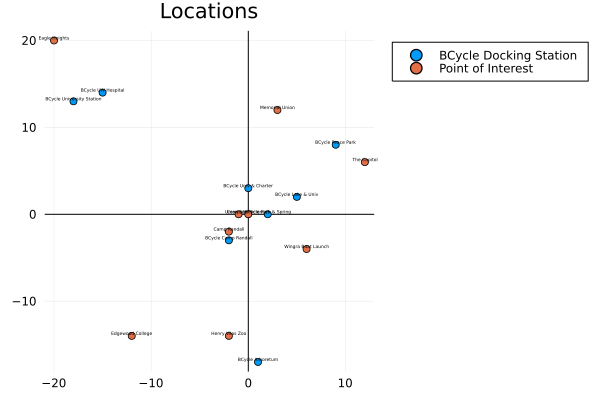

In [4]:
# Creates a nice plot of the city map
function plot_city_map(points=points, with_labels=true)
    (bcycle_names, bcycle_points, interest_names, interest_points) = extract_names_and_points(points)
    if with_labels
        plot(bcycle_points[:,1], bcycle_points[:,2], seriestype = :scatter, title = "Locations", framestyle =:zerolines, labels="BCycle Docking Station", legend=:outertopright, series_annotations=text.(bcycle_names, :bottom, 3))
        plot!(interest_points[:,1], interest_points[:,2], seriestype = :scatter, labels="Point of Interest", series_annotations=text.(interest_names, :bottom, 3)) 
    else
        plot(bcycle_points[:,1], bcycle_points[:,2], seriestype = :scatter, title = "Locations", framestyle =:zerolines, labels="BCycle Docking Station", legend=:outertopright)
        plot!(interest_points[:,1], interest_points[:,2], seriestype = :scatter, labels="Point of Interest") 
    end
end
plot_city_map()

Our solution requires a fully-connected graph. We calculate this based on Euclidean distance.

In [5]:
# Calculates the time between two points as the eucl.
# distance times some constant factor
function calculate_time(point1, point2)
    TIME_FACTOR = (pi)^(pi/2) / 1.5 # produces moderately-long rides
    return euclidean(point1, point2) * TIME_FACTOR
end

# Generates a fully connected graph connection each point
# with their travel time.
function generate_graph(all_points)
    num_points = size(all_points)[1]
    graf = Array{Float64}(undef, num_points, num_points)
    for i in 1:num_points
        for j in 1:num_points
            graf[i,j] = calculate_time(all_points[i,:], all_points[j,:])
        end
    end
    return graf
end

graf = generate_graph(just_coords)
graf

17×17 Matrix{Float64}:
   0.0       88.6545   96.0254   14.5145  …   58.6135   79.7027   22.7722
  88.6545     0.0      12.73     93.8922     124.273   113.362   111.342
  96.0254    12.73      0.0     102.633      126.342   111.342   118.396
  14.5145    93.8922  102.633     0.0         70.304    93.9784   24.4867
  68.5534   140.435   142.951    78.1629      17.0791   53.7081   56.07
  14.5145    74.8804   82.892    20.5266  …   68.9071   83.7672   37.1141
  42.7926    99.5877  110.539    29.029       99.0165  122.434    49.7938
  20.128     86.1515   91.0888   34.6295      44.2815   59.8448   32.4554
   8.05119   82.5983   89.3827   21.6785      56.9305   74.2283   29.029
  12.0768    79.7027   86.1515   25.4601      56.5019   71.6737   32.4554
 119.69      31.4409   29.3068  124.012   …  154.868   140.608   142.44
  46.9461   113.362   124.012    32.4554      98.2773  125.764    46.9461
  48.4746    72.9066   84.6333   41.0532     106.583   120.835    65.5319
  18.003     82.9897  

In [6]:
# Extracts and nicely packages the values from the JuMP variables.
function package_soln(first_point, last_point, x, t, btime, n)
    sol_x = zeros(n, n)
    for i=1:n
        for j=1:n
            sol_x[i,j] = JuMP.value(x[i,j])
        end
    end

    sol_t = zeros(n)
    for i=1:n
       sol_t[i] = JuMP.value(t[i])
    end

    sol_btime = zeros(n)
    for i=1:n
       sol_btime[i] = JuMP.value(btime[i])
    end
    return (first_point, last_point, sol_x, sol_t, sol_btime, n)
end

package_soln (generic function with 1 method)

This is what solves our optimization problem!

In [7]:
# Solves the optimization problem.
function solve_my_ride(start_bcycle, end_bcycle, scores, isdocking, graf, max_time, trip_time)

    (bcycle_names, bcycle_points, interest_names, interest_points) = extract_names_and_points(points)
    
    # Interfacing fit between modeler and analyzer
    maxd = findmax(graf)[1]
    n = length(graf[:,1])
    first_point = findfirst(x->x==start_bcycle, bcycle_names)
    last_point = findfirst(x->x==end_bcycle, bcycle_names)
    non_first_points = [collect(1:(first_point - 1)); collect((first_point + 1):n)]
    non_last_points = [collect(1:(last_point - 1)); collect((last_point + 1):n)]
    non_end_points = setdiff(collect(1:n), [first_point, last_point])
    

    
    m = Model(with_optimizer(Gurobi.Optimizer, OutputFlag=0))

    # Assignment Matrix
    @variable(m, x[1:n,1:n], Bin)

    # Time (Itinerary) Variable
    @variable(m, t[1:n] >= 0)

    # Remaining time on Bcycle
    @variable(m, btime[1:n] >= 0)

    # Start from node first_point
    @constraint(m, sum( x[j,first_point] for j=non_first_points) == 0)
    @constraint(m, sum( x[first_point,j] for j=non_first_points) == 1)
    @constraint(m, t[first_point] == 0)     # t=0 when we start
    @constraint(m, btime[first_point] == 0) # We start with a zero remaining time on the Bcycle (but starting point is docking station)

    # End at node last_point
    @constraint(m, sum( x[j,last_point] for j=non_last_points) == 1)
    @constraint(m, sum( x[last_point,j] for j=non_last_points) == 0)

    # Do not stay in a node
    for i=1:n
        @constraint(m, x[i,i]==0)
    end

    # Our solution forms a simple path
    for k in non_end_points
        @constraint(m, sum( x[i,k] for i=1:n) == sum( x[k,i] for i=1:n) )
        @constraint(m, sum( x[k,i] for i=1:n) <= 1)
    end

    # Update time variable
    for i in non_first_points   # i is the node you went
        for j in non_last_points   #j is the node you started
            @constraint(m, t[i] >= t[j] + graf[i,j]*x[j,i] - (n+1)*maxd*(1-x[j,i]))
        end
    end

    # Remaining time on Bcycle gets updated
    for i in non_first_points  # i is the node you are going to
        # A BCycle can only be used for 0-90 minutes
        @constraint(m, 0 <= btime[i] <= max_time)
        for j in non_last_points   # j is the node you are coming from                     
            if graf[j,i] > max_time  # not possible to assign
                @constraint(m, x[j,i] == 0)
            elseif isdocking[j] == 1 # btime is based on a fresh bcycle
                @constraint(m, btime[i] <= (max_time-graf[j,i])*x[j,i] + (max_time+1)*(1-x[j,i]))
                @constraint(m, btime[i] >= (max_time-graf[j,i])*x[j,i])
            else                     # btime is based on a used bcycle
                @constraint(m, btime[i] <= (btime[j]-graf[j,i])*x[j,i] + (max_time+1)*(1-x[j,i]))
                @constraint(m, btime[i] >= (btime[j]-graf[j,i])*x[j,i])
            end
        end
    end

    # Trip must end after trip_time
    @constraint(m, t[last_point] <= trip_time)
    

    @objective(m, Max, sum( sum( scores[i]* x[i,j] for j=1:n) for i=1:n))
    

    @time optimize!(m)
    
    println("Route Finder Status: ", termination_status(m))
    println()
    
    # Nicely package solution.
    return package_soln(first_point, last_point, x, t, btime, n)
end

solve_my_ride (generic function with 1 method)

In [92]:
# Displays a single node in the format
# node_name(time,time_left_on_bcycle)
function display_node(name, t, btime)
    print(name, "(",round(t,digits=2),",",round(btime,digits=2),")")
end

# Displays the solution path.
function display_soln(first_point, last_point, x, t, btime, n, points)
    # This prints the solution (prints the nodes of the path in order)
    plotty_x = []
    plotty_y = []
    println("node_name(time,time_left_on_bcycle)")
    current_node=first_point
    while current_node != last_point
        append!(plotty_x, points[current_node,1])
        append!(plotty_y, points[current_node,2])
        display_node(points[current_node,4], t[current_node], btime[current_node])
        println()
        print(" -> ")
        for j=1:n
            if j!=current_node && x[current_node,j]>0
                current_node = j
                break
            end

        end
    end
    append!(plotty_x, points[current_node,1])
    append!(plotty_y, points[current_node,2])
    display_node(points[current_node,4], t[current_node], btime[current_node])
    plot_city_map()
    display(plot!(plotty_x, plotty_y, label="My Ideal Ride", color="black"))
end

display_soln (generic function with 1 method)

## 4. Results and Discussion ##

Recall the scores that the user has specified for each point of interest (the BCycle stations are boring places so by default we will use value -1):

BCycle Park & Spring has score -1
BCycle UW Hospital has score -1
BCycle University Station has score -1
BCycle Lake & Univ has score -1
BCycle Arboretum has score -1
BCycle Univ & Charter has score -1
BCycle Peace Park has score -1
BCycle Camp Randall has score -1
Computer Sciences has score 5
Union South has score 3
Eagle Heights has score 10
The Capitol has score 8
Memorial Union has score 6
Camp Randall has score 7
Henry Vilas Zoo has score 1
Edgewood College has score 9
Wingra Boat Launch has score 3



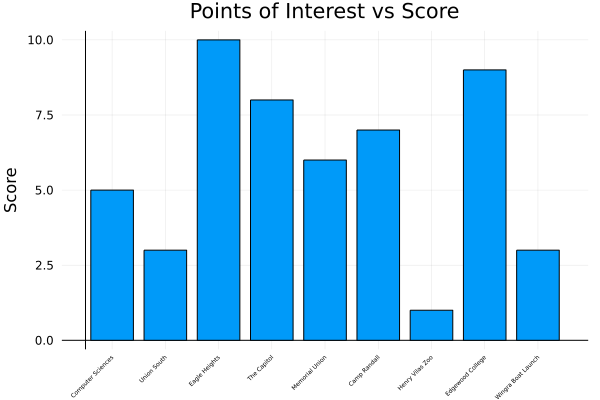

In [84]:
for i=1:17
    println(points[i,4], " has score ", user_scores[i])
end
println()
plot(points[:,4][9:17], user_scores'[9:17], seriestype = :bar, title = "Points of Interest vs Score", framestyle =:zerolines, ylabel="Score", xrotation=45, xtickfontsize=4, legend=false)

We demonstrate our solutions in a few selected cases. In all our examples the user starts and ends at a BCycle Station.

In our first example, the user has a long afternoon (6 hours) to tour. They must start at the arboretum and end at UW-Hospital. As we can see the optimal path  manages to visit many of the points of interest, including Eagle Heights which would typically be ignored due to distance, but the rider had to end at UW-Hospital anyways. The rider must also make pitstops at other BCycle stations to make sure that they don't run out of BCycle Time.

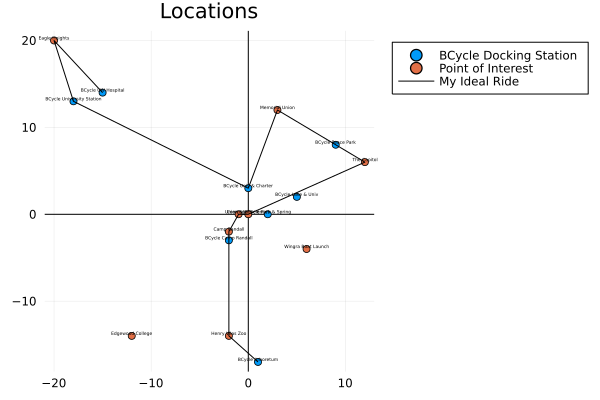

Set parameter Username
Academic license - for non-commercial use only - expires 2023-03-13
  3.785408 seconds (67.20 k allocations: 2.928 MiB)
Route Finder Status: OPTIMAL

node_name(time,time_left_on_bcycle)
BCycle Arboretum(0.0,0.0)
 -> Henry Vilas Zoo(17.08,72.92)
 -> BCycle Camp Randall(61.36,28.64)
 -> Camp Randall(65.39,85.97)
 -> Union South(74.39,76.97)
 -> Computer Sciences(78.41,72.95)
 -> The Capitol(132.42,18.94)
 -> BCycle Peace Park(146.94,4.42)
 -> Memorial Union(178.17,60.97)
 -> BCycle Univ & Charter(216.36,22.78)
 -> BCycle University Station(299.25,7.11)
 -> Eagle Heights(328.56,60.69)
 -> BCycle UW Hospital(360.0,29.25)

In [100]:
# Client Specification
# May take up to 120 seconds to solve.
max_time=90
trip_time=360
soln = solve_my_ride("BCycle Arboretum", "BCycle UW Hospital", user_scores, is_docking, graf,max_time, trip_time)
display_soln(soln..., points)
# We return a route for them.

In the next example, the rider is given significantly less time and is incentivized to stay within the City of Madison. Henry Vilas Zoo is not interesting enough for the rider to visit, even though it is so close to the route they take. Instead, we see that the rider journeys out only as far as The Capitol, but still visits The Capitol as it is a high-value point of interest.

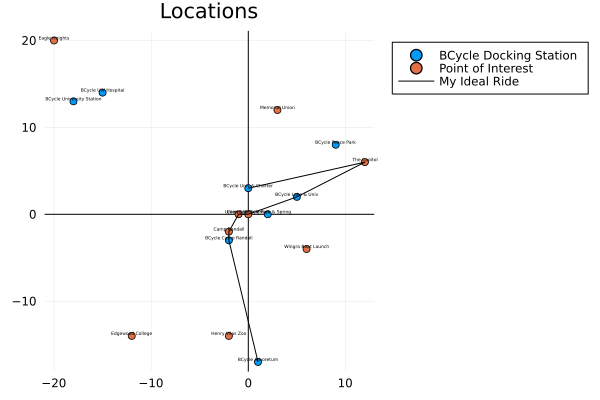

Set parameter Username
Academic license - for non-commercial use only - expires 2023-03-13
 50.366326 seconds (426.80 k allocations: 13.898 MiB, 0.12% gc time)
Route Finder Status: OPTIMAL

node_name(time,time_left_on_bcycle)
BCycle Univ & Charter(0.0,0.0)
 -> The Capitol(51.18,40.21)
 -> BCycle Lake & Univ(83.63,7.75)
 -> Computer Sciences(105.31,68.32)
 -> Union South(109.34,64.3)
 -> Camp Randall(118.34,55.29)
 -> BCycle Camp Randall(122.36,51.27)
 -> BCycle Arboretum(180.0,32.36)

In [95]:
max_time=90
trip_time=180
soln = solve_my_ride("BCycle Univ & Charter", "BCycle Arboretum", user_scores, is_docking, graf,max_time, trip_time)
display_soln(soln..., points)

We then significantly reduce the trip time; just over an hour to visit locations! The user rushes from their starting point to ending point.

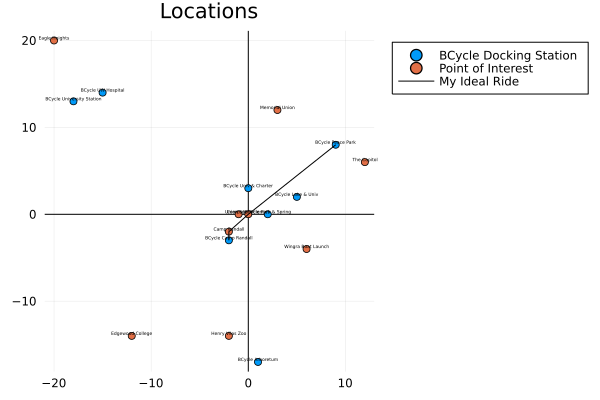

Set parameter Username
Academic license - for non-commercial use only - expires 2023-03-13
 10.724369 seconds (115.27 k allocations: 4.392 MiB)
Route Finder Status: OPTIMAL

node_name(time,time_left_on_bcycle)
BCycle Peace Park(0.0,0.0)
 -> Computer Sciences(49.59,41.53)
 -> Camp Randall(60.97,30.14)
 -> BCycle Camp Randall(65.0,26.11)

In [96]:
max_time=90
trip_time=65
soln = solve_my_ride("BCycle Peace Park", "BCycle Camp Randall", user_scores, is_docking, graf,max_time, trip_time)
display_soln(soln..., points)

Giving the rider just another 10 minutes they are also able to visit Union South.

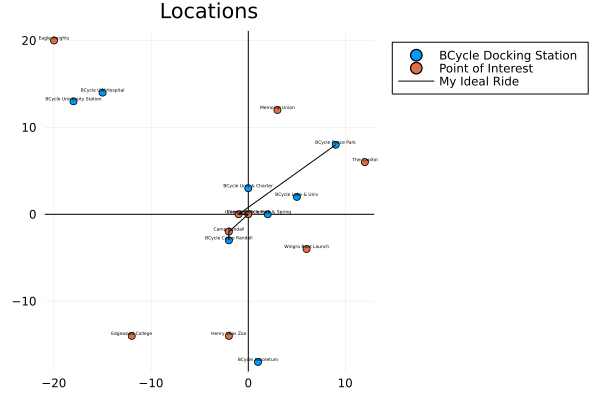

Set parameter Username
Academic license - for non-commercial use only - expires 2023-03-13
 22.807266 seconds (190.52 k allocations: 6.689 MiB)
Route Finder Status: OPTIMAL

node_name(time,time_left_on_bcycle)
BCycle Peace Park(0.0,0.0)
 -> Union South(55.56,38.45)
 -> Computer Sciences(59.59,34.42)
 -> Camp Randall(70.97,23.04)
 -> BCycle Camp Randall(75.0,19.01)

In [97]:
max_time=90
trip_time=75
soln = solve_my_ride("BCycle Peace Park", "BCycle Camp Randall", user_scores, is_docking, graf,max_time, trip_time)
display_soln(soln..., points)

Other routes can be tested as well. Some may be infeasible if not enough time is given for the trip, or if all BCycle stops are consumed (and thus the rider would exceed their time limit).

## 5. Conclusion ##

This is not to be included in the preliminary report.

## 6. Author Contributions

Note: The contributions in each category must sum to 100%. See Canvas for more details on what type of work belongs in each category.

We all contributed equally to this project.

#### 1. Modelling  
Cole: 33.3%  

Thanasis: 33.3%

Asmit: 33.3%

  
#### 2. Analysis  
Cole: 33.3%  

Thanasis: 33.3%

Asmit: 33.3%


#### 3. Data Gathering  
Cole: 33.3%  

Thanasis: 33.3%

Asmit: 33.3% 


#### 4. Software Implementation  
Cole: 33.3%  

Thanasis: 33.3%

Asmit: 33.3%


#### 5. Report writing and poster presentation   
Cole: 33.3%  

Thanasis: 33.3%

Asmit: 33.3%